<a href="https://colab.research.google.com/github/aman5898/Data-Science-Extended-LRC/blob/main/22-01-08-LinearRegression/From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# LinearRegression Slope and Intercept


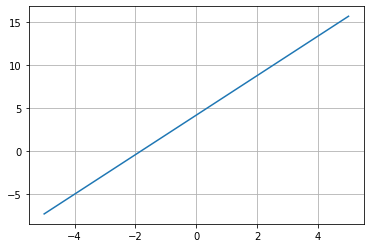

In [ ]:
x = np.linspace(-5, 5, 10)
y = 2.3*x + 4.2

plt.plot(x, y)
plt.grid()
plt.show()

In [ ]:
X = x.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

In [ ]:
print('Slope', lin.coef_)
print('Intercept', lin.intercept_)

Slope [2.3]
Intercept 4.200000000000001


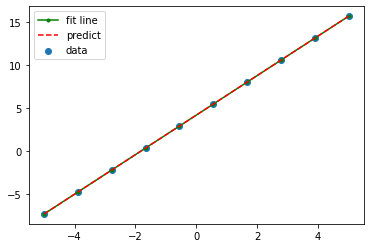

In [ ]:
plt.scatter(x, y, label = 'data')
plt.plot(x, lin.coef_[0]*x + lin.intercept_, 'g.-', label = 'fit line')
plt.plot(x, lin.predict(X), 'r--', label = 'predict')

plt.legend()

In [ ]:
(lin.coef_[0]*x + lin.intercept_) == lin.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## 2D

In [ ]:
x1 = np.linspace(-5, 10, 10)
x2 = np.linspace(-2, 10, 10)

y = 0.1*x1 + 0.6*x2 + 0.2

fig = px.scatter_3d(x = x1, y=x2, z=y)
fig.show()

In [ ]:
X = np.array([x1,x2]).transpose()
lin.fit(X, y)

print('Slope', lin.coef_)
print('Intercept', lin.intercept_)

Slope [0.35365854 0.28292683]
Intercept 0.8341463414634145


In [ ]:
y_pred_lin = x1*lin.coef_[0] + x2*lin.coef_[1] + lin.intercept_

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=x1,
        y=x2,
        z=y,
    )
)

fig.add_trace(
    go.Scatter3d(
        x=x1,
        y=x2,
        z=y_pred_lin,
    )
)


fig.show()

# From Scratch

In [219]:
class LinearRegressio():

  def __init__(self, learning_rate = 0.01, iterations = 1000):
    self.learning_rate = learning_rate
    self.iterations = iterations
  
  def fit(self, X, y):
    
    self.row, self.col = X.shape

    # self.W = np.random.rand(self.col)
    self.W = np.zeros(self.col)

    self.b = 0
    self.X = X
    self.y = y
    
    for i in range(self.iterations):
        y_pred = self.predict(self.X)

        dW = - (2 * self.X.T.dot(self.y - y_pred)) / self.row
        db = - 2 * (self.y - y_pred).sum() / self.row

        self.W = self.W - self.learning_rate*dW
        self.b = self.b - self.learning_rate*db

    return self
    
  def predict(self, X):
    return X.dot( self.W ) + self.b


In [220]:
df = pd.read_csv( "https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Chapter4_Training_Models/assets/salary_data.csv" )
df.sample(7)

,YearsExperience,Salary
5,2.9,56642
14,4.5,61111
29,10.5,121872
10,3.9,63218
11,4.0,55794
20,6.8,91738
21,7.1,98273


In [221]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3 )

In [222]:
model = LinearRegressio( iterations = 1000, learning_rate = 0.01 )

In [223]:
model.fit( X_train, Y_train )

In [224]:
Y_pred = model.predict( X_test )

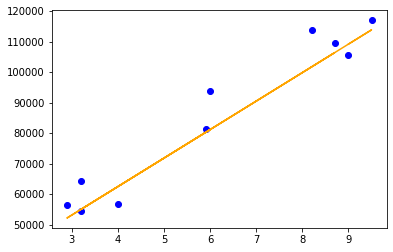

In [226]:
plt.scatter( X_test, Y_test, color = 'blue' )
      
plt.plot( X_test, Y_pred, color = 'orange' )

# Polynomial

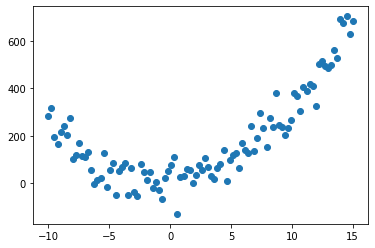

In [ ]:
n = 100

x = np.linspace(-10, 15, n)
y = 3*x*x + 2*x + np.random.randn(n)*50
plt.scatter(x, y)

In [ ]:
X = x.reshape(-1, 1)
lin.fit(X, y)

LinearRegression()

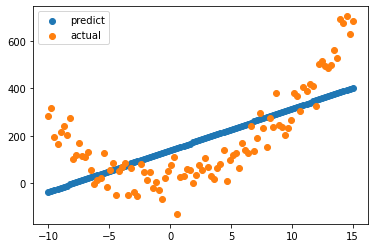

In [ ]:
plt.scatter(x, lin.predict(X), label='predict')
plt.scatter(x, y, label = 'actual')

plt.legend()
plt.show()

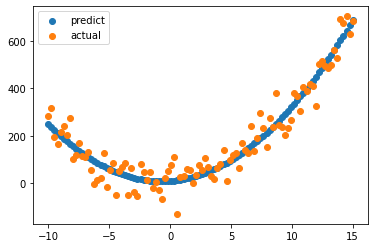

In [ ]:
X = np.array([x, x*x]).transpose()

lin.fit(X, y)

plt.scatter(x, lin.predict(X), label='predict')
plt.scatter(x, y, label = 'actual')

plt.legend()
plt.show()

## x^3

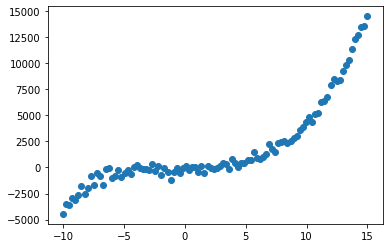

In [ ]:
y = 4*x**3 + 3*x*x + 2*x + np.random.randn(n)*400

plt.scatter(x, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poy = PolynomialFeatures(degree = 4)
X = poy.fit_transform(x.reshape(-1, 1))

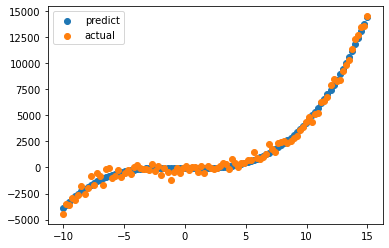

In [ ]:
lin.fit(X, y)

plt.scatter(X[:, 1], lin.predict(X), label='predict')
plt.scatter(X[:, 1], y, label = 'actual')

plt.legend()
plt.show()

## Overfit

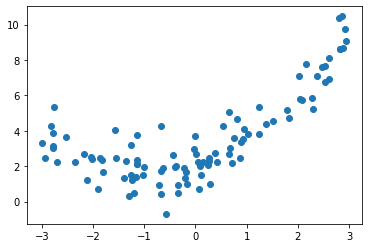

In [ ]:
m = 100

x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.scatter(x, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=300, include_bias=False)
X = poly_features.fit_transform(x)
X

In [ ]:
lin = LinearRegression()
lin.fit(X, y)
lin.intercept_, lin.coef_

In [ ]:
from sklearn.metrics import mean_squared_error

min = 1
error = 1000000000
for i in range(1, 301):
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X = poly_features.fit_transform(x)
    lin = LinearRegression()
    lin.fit(X, y)
    mse = mean_squared_error(y, lin.predict(X))
    if mse < error:
      error = mse
      min = i
      print(i, mse)

1 3.002183674239198
2 0.8639089289459077
3 0.8630566517504201
4 0.862897053267394
5 0.8445366982449646
6 0.8330439791954943
7 0.8321490747613599
8 0.805734590668417
9 0.8015331984951122
10 0.796702337646384
11 0.7909504561766211
12 0.788330549438609
13 0.7799494115247547
14 0.7796144984862988
15 0.7796144882094943
16 0.7782297380249078
17 0.776815375802666
18 0.775145081671167
19 0.7666280507456493
20 0.7613926837028459
21 0.7489671727988214
22 0.7487533642568631
23 0.739598213208435
24 0.7241948626099557
25 0.7048208937183393


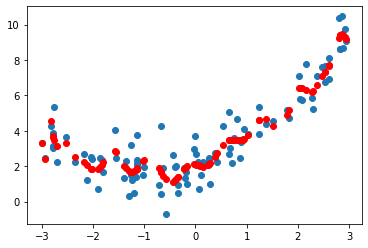

In [ ]:
poly_features = PolynomialFeatures(degree=25, include_bias=False)
X = poly_features.fit_transform(x)
X = X

lin.fit(X, y)

srt = x.copy()
srt.sort()
srtX = poly_features.fit_transform(srt)
# srtX = np.hstack([srtX, np.exp(srt)])

plt.scatter(x, y)
plt.scatter(srt, lin.predict(srtX), color = 'r')

**Trying to Memorize all data**

# Regularization

## Ridge

1/2 W^2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning:

Ill-conditioned matrix (rcond=3.28015e-25): result may not be accurate.



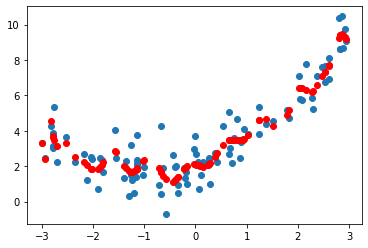

In [ ]:
from sklearn.linear_model import Ridge

rig = Ridge()

rig.fit(X, y)

plt.scatter(x, y)
plt.scatter(srt, lin.predict(srtX), color = 'r')

In [ ]:
lin.coef_

array([[-7.95349042e-01, -4.87636969e+00,  2.94737459e+01,
         3.15079052e+01, -1.10072118e+02, -6.39162523e+01,
         1.80328012e+02,  6.75038725e+01, -1.62176693e+02,
        -4.27713787e+01,  8.93192901e+01,  1.73955817e+01,
        -3.20020265e+01, -4.69548832e+00,  7.69729909e+00,
         8.49803133e-01, -1.25457104e+00, -1.01894822e-01,
         1.36815990e-01,  7.76108214e-03, -9.56476383e-03,
        -3.39859270e-04,  3.87645629e-04,  6.51235763e-06,
        -6.92683965e-06]])

In [ ]:
rig.coef_

array([[ 1.00850240e+02,  6.45041484e+01,  1.76195413e+01,
         3.18689579e+01,  5.29437435e+00, -4.49641416e-02,
         7.76843156e-02, -1.76574390e+01, -1.11160270e+01,
        -7.98062523e+00, -8.10919958e+00,  1.85675691e+01,
         1.42536395e+01, -1.03827566e+01, -6.88920508e+00,
         2.99227807e+00,  1.69025811e+00, -5.03067988e-01,
        -2.37591570e-01,  4.98146178e-02,  1.93560718e-02,
        -2.69699577e-03, -8.48985306e-04,  6.16440538e-05,
         1.54600952e-05]])

In [ ]:
from sklearn.metrics import mean_squared_error

print('Linear', mean_squared_error(y, lin.predict(X)))

print('Ridgee', mean_squared_error(y, rig.predict(X)))

Linear 0.7048208937183393
Ridgee 0.7584489971642313


## Lasso

Least Absolute Shrinkage and Selection Operator Regression

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

poly_features = PolynomialFeatures(degree=25, include_bias=False)
X = StandardScaler().fit_transform(poly_features.fit_transform(x))


lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

rig = Ridge()
rig.fit(X, y)

lin.fit(X, y)

LinearRegression()

In [ ]:
lin.coef_

array([[-1.33294521e+00, -1.41536379e+01,  3.11934007e+02,
         7.46372383e+02, -8.74522675e+03, -1.22901331e+04,
         1.13143570e+05,  1.06601661e+05, -8.23708819e+05,
        -5.60322684e+05,  3.72887561e+06,  1.90611219e+06,
        -1.11019887e+07, -4.33373542e+06,  2.23806605e+07,
         6.64719468e+06, -3.07909772e+07, -6.79163200e+06,
         2.85164818e+07,  4.42949281e+06, -1.70201361e+07,
        -1.66810923e+06,  5.91668857e+06,  2.75957326e+05,
        -9.10603112e+05]])

In [ ]:
rig.coef_

array([[ 1.53731757,  1.3755612 , -0.01781808, -0.12388977, -0.09490662,
        -0.11043711, -0.07554175,  0.07250537, -0.02076009,  0.19287063,
         0.0425304 ,  0.22991251,  0.09165534,  0.20153307,  0.11495709,
         0.12920395,  0.10955173,  0.03095306,  0.07747033, -0.07942874,
         0.0228344 , -0.19183849, -0.04975578, -0.29912267, -0.13599937]])

In [ ]:
lasso_reg.coef_

array([1.43978661, 1.35404436, 0.        , 0.        , 0.        ,
       0.0285501 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06308865, 0.        , 0.01359715, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## Early Stopping

In [ ]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
      penalty=None, learning_rate="constant", eta0=0.0005)

In [ ]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
error_train = []
error_test = []
for epoch in range(1000):
    sgd_reg.fit(xtrain, ytrain) # continues where it left off
    y_val_predict = sgd_reg.predict(xtest)
    val_error = mean_squared_error(ytest, y_val_predict)
    train_error = mean_squared_error(ytrain, sgd_reg.predict(xtrain))
    
    error_train.append(train_error)
    error_test.append(val_error)
    
    if val_error < minimum_val_error:
      minimum_val_error = val_error
      best_epoch = epoch
      best_model = clone(sgd_reg)


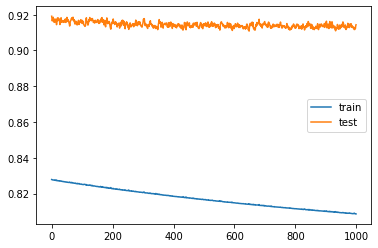

In [ ]:
plt.plot(error_train, label = 'train')
plt.plot(error_test, label = 'test')

plt.legend()

# Project

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.sample(7)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
208,0.13587,0.0,10.59,1,0.489,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37,12.5
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
169,2.44953,0.0,19.58,0,0.605,6.402,95.2,2.2625,5,403,14.7,330.04,11.32,22.3
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 
25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract 
bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 
1940

DIS: Weighted distances to five Boston employment 
centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of 
[people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s




In [27]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


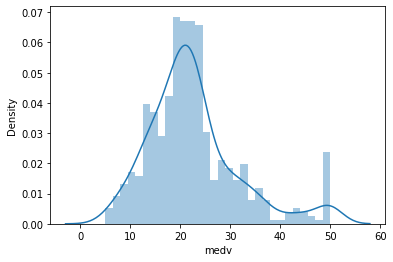

In [29]:
sns.distplot(df['medv'], bins=30)

In [32]:
corr = df.corr()
corr['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

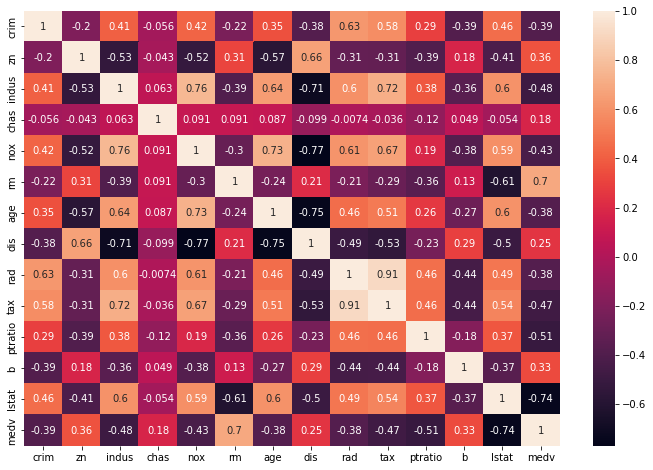

In [35]:
plt.figure(figsize = (12, 8))

sns.heatmap(data=corr, annot=True)

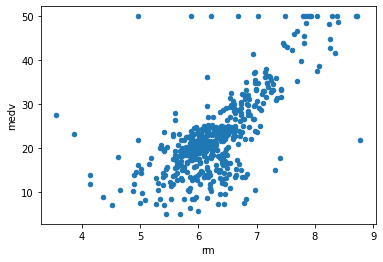

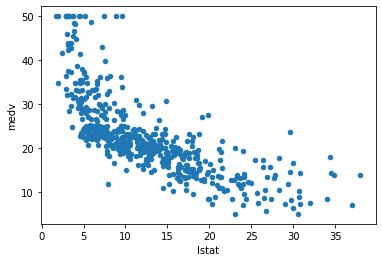

In [36]:
df.plot(kind = 'scatter', x = 'rm',y='medv')
df.plot(kind = 'scatter', x = 'lstat',y='medv')

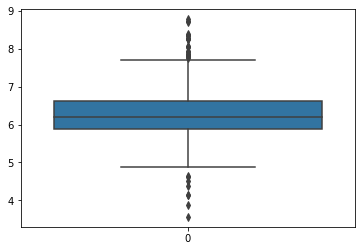

In [49]:
sns.boxplot(data = df['rm'])

In [110]:
print(np.corrcoef(df['medv'], df['lstat']**2))
print(np.corrcoef(df['medv'], df['lstat']))

[[ 1.         -0.62217876]
 [-0.62217876  1.        ]]
[[ 1.         -0.73766273]
 [-0.73766273  1.        ]]


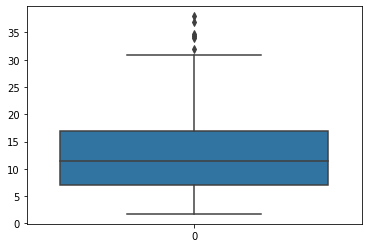

In [50]:
sns.boxplot(data = df['lstat'])

In [122]:
X = df[['rm','lstat']]
X['lstat^2'] = X['lstat']**2
y= df['medv']
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rm,lstat,lstat^2
0,6.575,4.98,24.8004
1,6.421,9.14,83.5396
2,7.185,4.03,16.2409
3,6.998,2.94,8.6436
4,7.147,5.33,28.4089


In [123]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25)

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [125]:
model.score(xtest,ytest)

0.6895953554178373

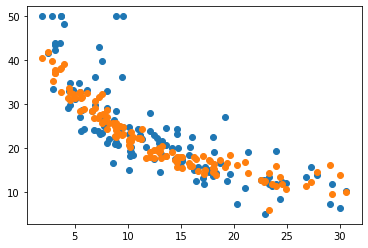

In [126]:
plt.scatter(xtest['lstat'], ytest)
plt.scatter(xtest['lstat'], model.predict(xtest))
